# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка Задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Значения столбцов таблицы:

- RowNumber — номер строки таблицы;
- CustomerId — идентификатор клиента;
- Surname — фамилия клиента;
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
- Geography — страна проживания клиента (банк межнациональный);
- Gender — пол клиента;
- Age — возраст клиента;
- Tenure — сколько лет клиент пользуется банком;
- Balance — сколько у клиента денег на счетах в банке;
- NumOfProduct — число услуг банка, которыми воспользовался клиент;
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
- IsActiveMember — есть ли у клиента статус «активный клиент» (1 — да, 0 — нет);
- EstimatedSalary — предполагаемая заработная плата клиента;
- Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

Импортировать библиотеки:

In [1]:
#import the standard libraries
import pandas as pd, numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

#import the libraries for model testing
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing

#set visualization style
%matplotlib inline
plt.style.use('seaborn-v0_8')

Прочитать данные:

In [2]:
#import the data set
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Практика: **Логистическая Регрессия**

### **Задание 5.0**

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

In [3]:
#basic information on the data set
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#total number of rows and columns
churn_data.shape

(10000, 14)

In [5]:
#basic descriptive statistics
churn_data.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [6]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

Избавиться от неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [7]:
#delete uninformative features
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверить на наличие в данных пропусков:

In [8]:
#check for blank values
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверить на наличие в данных дубликатов:

In [9]:
#check for duplicates
churn_data[churn_data.duplicated()].sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

##### Преобразование Данных

Корректировка Age:

In [10]:
#check the age range
print(churn_data['Age'].min(), churn_data['Age'].max(), sep=', ')

18, 84


In [11]:
#create a category for each generation
age_conditions = [churn_data['Age'] < 11, # no customer with this age, but a category is still needed
                  churn_data['Age'].between(11, 26), # gen z
                  churn_data['Age'].between(27, 42), # millenials
                  churn_data['Age'].between(43, 58), # gen x
                  churn_data['Age'].between(59, 68), # boomers ii
                  churn_data['Age'].between(69, 77), # boomers i
                  churn_data['Age'] > 77 # post-war
                  ]

#set the category name
age_category = ['<11', '11-26', '27-42', '43-58', '59-68', '69-77', '78+']
churn_data['AgeRange'] = np.select(age_conditions, age_category)

Корректировка Exited:

In [12]:
#Exited: 1 - left, 0 - active

#create a function to change Exited into a category
def status_loyalty(x):
    if x == 1:
        return 'Exited'
    elif x == 0:
        return 'Loyal'
    
#apply the function and create a new column
churn_data['Status'] = churn_data['Exited'].apply(status_loyalty)

##### Исследовательский Анализ Данных

Гистограмма Баланса Счета по Возрастной Категории

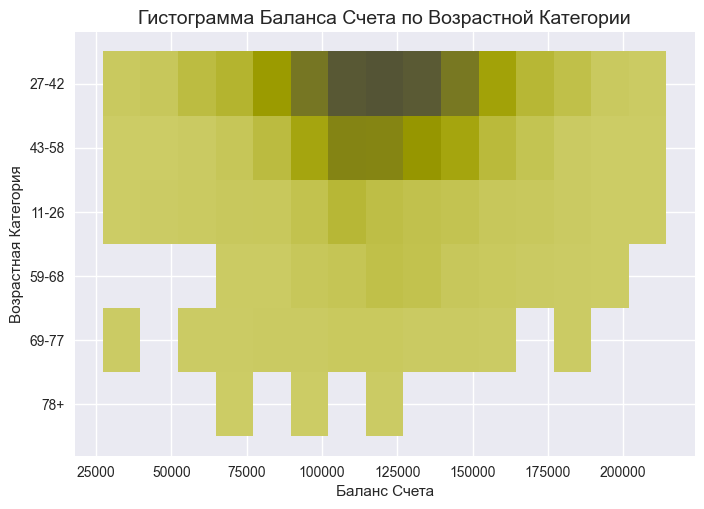

In [13]:
#filter the customers by account balance > 2500
over_balance = churn_data[churn_data['Balance'] > 2500]

#group by age category, and show the aggregate functions for count (number of accounts), mean (average value), median, and min / max on account balance
over_balance.groupby(by = 'AgeRange', as_index=False)['Balance'].agg(['count', 'mean', 'median', 'min', 'max']).round(0) \
    .sort_values(by='count', ascending=False) #round to whole number, and sort by highest count first
    
#build a histogram by AgeRange and Account Balance
fig = sns.histplot(
    data=over_balance,
    x='Balance',
    y='AgeRange',
    bins=15,
    color='yellow',
    )

#set the chart title
fig.set_title('Гистограмма Баланса Счета по Возрастной Категории', fontsize=14)
fig.set_xlabel('Баланс Счета')
fig.set_ylabel('Возрастная Категория');

Баланс Клиентского Счета по Статусу Лояльности

In [14]:
#split the data by gender
bar_data = churn_data.groupby(
    by=['Gender', 'Status'],
    as_index=False
)[['Balance']].sum().round()

#split the data by gender
bar_data = churn_data.groupby(
    by=['Gender', 'Status'],
    as_index=False
)[['Balance']].sum().round()

#build a bar chart
fig = px.bar(
    data_frame=bar_data,
    x='Status',
    y='Balance',
    color='Gender', #stack by gender
    text = 'Balance', 
    orientation='v',
    height=500,
    width=600,
    title='Баланс Клиентского Счета по Статусу Лояльности'
)

#set the title of the axis
fig.update_layout(
    xaxis_title_text='Статус Лояльности',
    yaxis_title_text='Баланс Счета',
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


Возрастные Различия между Ушедшими и Лояльными Клиентами

In [15]:
#create a boxplot
fig = px.box(
    data_frame=churn_data,
    x='Age',
    y='Status',
    color='Status',
    #set horizontal orientation
    orientation='h',
    title='Возрастные Различия между Ушедшими и Лояльными Клиентами',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Возраст Клиента',
   yaxis_title_text='Статус Клиента',
   showlegend=False
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Распределение между Количеством Продуктов и Статусом Клиента

In [16]:
#build a histogram
fig = px.histogram(
    churn_data,
    x = 'Status',
    color = 'NumOfProducts',
    width = 700,
    height = 500,
    title='Распределение между Количеством Продуктов и Статусом Клиента'
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Статус Клиента',
   yaxis_title_text='Количество',
   bargap=0.35
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Ушедшие Клиенты по Категориям Кредитного Рейтинга

In [17]:
#import the function
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

#apply the function for CreditScore
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [18]:
#create a pivot table with credit category by tenure
credit_cat_by_tenure = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

#create a heatmap
fig = px.imshow(credit_cat_by_tenure[credit_cat_by_tenure.abs() >= 0.35],
                text_auto=True)

#set characteristics
fig.update_layout(height=650,
                  width=800,
                  xaxis_title_text='Срок Владения',
                  yaxis_title_text='Категория Кредитного Рейтинга',
                  title_text='Ушедшие Клиенты по Категориям Кредитного Рейтинга'
)

fig.show()

Преобразование Строковых Данных

In [19]:
#encode the feature numerically
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)

### **Задание 5.1**

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

In [20]:
#create new features
churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure'] / (churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / (churn_data['Age'])

Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [21]:
#choose the features for the model
X = churn_data.drop(['Exited', 'AgeRange', 'Status', 'CreditScoreCat'],
                    axis=1,
                    errors='ignore')

y = churn_data['Exited']

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [22]:
#check whether the data is balanced
y.value_counts(normalize=True)

Exited
0    0.675568
1    0.324432
Name: proportion, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [23]:
#use stratified samplifing to split the data evenly
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [24]:
#check that the split is reasonably equal
print(f'Train: \n{y_train.value_counts(normalize=True)}\n')
print(f'Test : \n{y_test.value_counts(normalize=True)}')

Train: 
Exited
0    0.675704
1    0.324296
Name: proportion, dtype: float64

Test : 
Exited
0    0.675159
1    0.324841
Name: proportion, dtype: float64


Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### **Задание 5.2**

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

##### **Вывод**:
Исследовательский анализ данных показал наличие выбросов и в отличие от StandardScaler и MinMaxScaler, RobustScaler устойчив к влиянию выбросов в данных.

In [25]:
#initialize the normalizer for Robust Scaler
r_scaler = preprocessing.RobustScaler()

#model learning on train data
r_scaler.fit(X_train)

#normalize the data
X_train_r_scaled = r_scaler.transform(X_train)
X_test_r_scaled = r_scaler.transform(X_test)

Теперь переходим к моделированию.

### **Задание 5.3**

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


##### **Вывод**:

Использовать **F1-Score**, так как это полезный показатель для измерения производительности моделей классификации, когда данные несбалансированны, в отличии от accuracy, которая измеряет количество раз модель смогла правильно определить класс данных во всем наборе данных, только до тех пор, пока набор данных содержит одинаковое количество образцов для каждого класса. Дополнительно к этому F1-Score учитывает тип ошибок — ложноположительные и ложноотрицательные — а не только количество неверных прогнозов.

F1-Score вычисляет среднее значение precision и recall, где относительный вклад обоих этих показателей равен показателю F1. Поскольку precision и recall являются rates / показателями, для F1-Score используется среднее гармоническое, а не обычное среднее арифметическое.

F1-Score присваивает одинаковый вес как precision, так и recall, и поэтому различия могут быть скрыты, но ошибка в предсказании в этом типе задачи - предсказание оттока клиентов банка - не настолько значима, как к примеру выявление неисправных компонентов в машинном оборудовании.

### **Задание 5.4**

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

*First Test*:
- penalty: 'l2',
- C: 1.0,
- max_iter: 100,
- solver: 'lbfgs',
- random_state: None

In [26]:
#create the object class
log_reg1 = linear_model.LogisticRegression()

#model learning
log_reg1.fit(X_train_r_scaled, y_train)

#make prediction for both sets of data: train / test
y_pred_train1 = log_reg1.predict(X_train_r_scaled)
y_pred_test1 = log_reg1.predict(X_test_r_scaled)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1 Score: {metrics.f1_score(y_train, y_pred_train1):.3f}')
print(sep='/n')

print('Test Classification Metrics:')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred_test1):.3f}')

Train Classification Metrics:
F1 Score: 0.513

Test Classification Metrics:
F1 Score: 0.496


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



*Second Test*:
- penalty: 'l1',
- tol=0.05,
- C: 1.0,
- max_iter: 100,
- solver: 'saga',
- fit_intercept=False,
- intercept_scaling=2,
- class_weight='balanced',
- multi_class='ovr',
- random_state: 42

In [27]:
#create the object class
log_reg2 = linear_model.LogisticRegression(
    penalty='l1',
    tol=0.05,
    C=1,
    max_iter=100,
    solver='saga', 
    fit_intercept=False,
    intercept_scaling=2,
    class_weight='balanced',
    multi_class='ovr',
    random_state=42
)

#model learning
log_reg2.fit(X_train_r_scaled, y_train)

#make prediction for both sets of data: train / test
y_pred_train2 = log_reg2.predict(X_train_r_scaled)
y_pred_test2 = log_reg2.predict(X_test_r_scaled)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1 Score: {metrics.f1_score(y_train, y_pred_train2):.3f}')
print(sep='/n')

print('Test Classification Metrics:')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred_test2):.3f}')

Train Classification Metrics:
F1 Score: 0.442

Test Classification Metrics:
F1 Score: 0.449


*Third Test*:
- penalty: 'l1',
- tol=0.0001,
- C: 5,
- max_iter: 2000,
- solver: 'liblinear',
- fit_intercept=True,
- intercept_scaling=1,
- class_weight='balanced',
- multi_class='auto',
- random_state: 42

In [28]:
#create the object class
log_reg = linear_model.LogisticRegression(
    penalty='l1',
    tol=0.0001,
    C=5,
    max_iter=1000,
    solver='liblinear',
    fit_intercept=True,
    intercept_scaling=1,
    class_weight='balanced',
    multi_class='auto',
    random_state=42
)

#model learning
log_reg.fit(X_train_r_scaled, y_train)

#make prediction for both sets of data: train / test
y_pred_train3 = log_reg.predict(X_train_r_scaled)
y_pred_test3 = log_reg.predict(X_test_r_scaled)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1 Score: {metrics.f1_score(y_train, y_pred_train3):.3f}')
print(metrics.classification_report(y_train, y_pred_train3))

print(sep='/n')

print('Test Classification Metrics:')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred_test3):.3f}')
print(metrics.classification_report(y_test, y_pred_test3))

Train Classification Metrics:
F1 Score: 0.595
              precision    recall  f1-score   support

           0       0.83      0.68      0.74      1271
           1       0.51      0.71      0.59       610

    accuracy                           0.69      1881
   macro avg       0.67      0.69      0.67      1881
weighted avg       0.73      0.69      0.70      1881


Test Classification Metrics:
F1 Score: 0.577
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       424
           1       0.49      0.70      0.58       204

    accuracy                           0.67       628
   macro avg       0.66      0.68      0.65       628
weighted avg       0.71      0.67      0.68       628



In [29]:
#separate the results
train_x = [metrics.f1_score(y_train, y_pred_train1), metrics.f1_score(y_train, y_pred_train2), metrics.f1_score(y_train, y_pred_train3)]

test_y = [metrics.f1_score(y_test, y_pred_test1), metrics.f1_score(y_test, y_pred_test2), metrics.f1_score(y_test, y_pred_test3)]

#create the data set for visualization
nd = np.array([train_x,
               test_y])

graph_data = pd.DataFrame(nd,
                          index=['train_x', 'test_y'],
                          columns=['test1', 'test2', 'test3']
)

In [30]:
#create the bar chart
fig = px.bar(graph_data,
              title='Распределение F1-Score')

#set the title of the axis
fig.update_layout(
    xaxis_title_text='Набор Данных',
    yaxis_title_text='Итог',
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



##### **Вывод**:

При использовании следующих параметров обучения модели достигнут наилучший результат с параметрами:
- **Тип Регуляризации**: *penalty='l1'* при комбинации вместе с *solver='liblinear'*;
- **Коэффициент C**: *C = 5*, при *C = 1 (default)* показывает результат хуже, особенно при комбинации с *penalty='l1'* и *solver='saga'*;
- **Максимальное Число Итераций**: - *max_iter=1000*, при значении *max_iter=100 (default)* - результат немного хуже на несколько единиц после запятой, в других случаях коэффициенты не сходиться в одной точке;
- **Метод Оптимизации Функции Потерь**: - *solver='liblinear'* или *solver='lbfgs'*, *solver='saga'* лучше использовать при большой выборки данных.
- **Метод Перехвата**: - *fit_intercept=True (default)*, *fit_intercept=False* результат немного хуже на несколько единиц после запятой для тренировочных данных;
- **Масштабирование Перехвата**: - *intercept_scaling >= 1* при комбинации с *solver='liblinear'* и *fit_intercept=True*;
- **Вес Класса**: *class_weight='balanced'* со значением y для автоматической корректировки весов;
- **Мультикласс**: *multi_class='auto'* для автоматической оптимазации solver.

F1-Score на тренировочных и тестовых данных выше 0.5, с F1-Score = 0.577 для тестовых данных, но не значительно. Высокая вероятность, что модель недообучена и адаптирована только под тренировочный данные.
Мало вероятно, что модель способна правильно предсказывать на реальных данных.

### **Задание 5.5**

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

In [31]:
#initialize the normalizer for Polynomial Features
poly_feat_scaler = preprocessing.PolynomialFeatures(
    degree=3,
    include_bias=False
)

#model learning on train data
poly_feat_scaler.fit(X_train_r_scaled)

#normalize the data
X_train_poly_feat_scaled = poly_feat_scaler.transform(X_train_r_scaled)
X_test_poly_feat_scaled = poly_feat_scaler.transform(X_test_r_scaled)

#confirm the rows and columns
X_train_poly_feat_scaled.shape, X_test_poly_feat_scaled.shape

((1881, 454), (628, 454))

*First Test*:
- penalty: 'l2',
- C: 1.0,
- max_iter: 100,
- solver: 'lbfgs',
- random_state: None

In [32]:
#create the object class
log_reg_poly_feat1 = linear_model.LogisticRegression()

#model learning
log_reg_poly_feat1.fit(X_train_poly_feat_scaled, y_train)

#make prediction for both sets of data: train / test
y_train_pred_pf1 = log_reg_poly_feat1.predict(X_train_poly_feat_scaled)
y_test_pred_pf1 = log_reg_poly_feat1.predict(X_test_poly_feat_scaled)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1 score: {metrics.f1_score(y_train, y_train_pred_pf1):.3f}')
print(sep='/n')

print('Test Classification Metrics:')
print(f'F1 score: {metrics.f1_score(y_test, y_test_pred_pf1):.3f}')

Train Classification Metrics:
F1 score: 0.357

Test Classification Metrics:
F1 score: 0.348


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



*Second Test*:
- penalty: 'l1',
- tol=0.001,
- C: 1.0,
- max_iter: 100,
- solver: 'saga',
- fit_intercept=True,
- intercept_scaling=1,
- class_weight=None,
- multi_class='ovr',
- random_state: 42

In [33]:
#create the object class
log_reg_poly_feat2 = linear_model.LogisticRegression(
    penalty='l1',
    tol=0.001,
    C=1.0,
    max_iter=100,
    solver='saga', 
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    multi_class='ovr',
    random_state=42
)

#model learning
log_reg_poly_feat2.fit(X_train_poly_feat_scaled, y_train)

#make prediction for both sets of data: train / test
y_train_pred_pf2 = log_reg_poly_feat2.predict(X_train_poly_feat_scaled)
y_test_pred_pf2 = log_reg_poly_feat2.predict(X_test_poly_feat_scaled)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1 score: {metrics.f1_score(y_train, y_train_pred_pf2):.3f}')
print(sep='/n')

print('Test Classification Metrics:')
print(f'F1 score: {metrics.f1_score(y_test, y_test_pred_pf2):.3f}')

Train Classification Metrics:
F1 score: 0.405

Test Classification Metrics:
F1 score: 0.405


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



*Third Test*:
- penalty: 'l1',
- tol=0.00001,
- C: 10,
- max_iter: 1000,
- solver: 'liblinear',
- fit_intercept=True,
- intercept_scaling=10,
- class_weight='balanced',
- multi_class='auto',
- random_state: 42

In [34]:
#create the object class
log_reg_poly_feat3 = linear_model.LogisticRegression(
    penalty='l1',
    tol=0.00001,
    C=10,
    max_iter=1000,
    solver='liblinear',
    fit_intercept=False,
    intercept_scaling=10,
    class_weight='balanced',
    multi_class='auto',
    random_state=42
)

#model learning
log_reg_poly_feat3.fit(X_train_poly_feat_scaled, y_train)

#make prediction for both sets of data: train / test
y_train_pred_pf3 = log_reg_poly_feat3.predict(X_train_poly_feat_scaled)
y_test_pred_pf3 = log_reg_poly_feat3.predict(X_test_poly_feat_scaled)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1 score: {metrics.f1_score(y_train, y_train_pred_pf3):.3f}')
print(sep='/n')

print('Test Classification Metrics:')
print(f'F1 score: {metrics.f1_score(y_test, y_test_pred_pf3):.3f}')

Train Classification Metrics:
F1 score: 0.767

Test Classification Metrics:
F1 score: 0.652


*Fourth Test*:
- penalty: 'l1',
- tol=0.0001,
- C: 1.0,
- max_iter: 1000,
- solver: 'liblinear',
- fit_intercept=True,
- intercept_scaling=10,
- class_weight='balanced',
- multi_class='auto',
- random_state: 42

In [35]:
#create the object class
log_reg_poly_feat = linear_model.LogisticRegression(
    penalty='l1',
    tol=0.0001,
    C=1,
    max_iter=1000,
    solver='liblinear',
    fit_intercept=True,
    intercept_scaling=10,
    class_weight='balanced',
    multi_class='auto',
    random_state=42
)

#model learning
log_reg_poly_feat.fit(X_train_poly_feat_scaled, y_train)

#make prediction for both sets of data: train / test
y_train_pred_pf4 = log_reg_poly_feat.predict(X_train_poly_feat_scaled)
y_test_pred_pf4 = log_reg_poly_feat.predict(X_test_poly_feat_scaled)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1 score: {metrics.f1_score(y_train, y_train_pred_pf4):.3f}')
print(metrics.classification_report(y_train, y_train_pred_pf4))
print(sep='/n')

print('Test Classification Metrics:')
print(f'F1 score: {metrics.f1_score(y_test, y_test_pred_pf4):.3f}')
print(metrics.classification_report(y_test, y_test_pred_pf4))


Train Classification Metrics:
F1 score: 0.755
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1271
           1       0.69      0.83      0.75       610

    accuracy                           0.83      1881
   macro avg       0.80      0.83      0.81      1881
weighted avg       0.84      0.83      0.83      1881


Test Classification Metrics:
F1 score: 0.670
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       424
           1       0.61      0.74      0.67       204

    accuracy                           0.76       628
   macro avg       0.74      0.76      0.74       628
weighted avg       0.78      0.76      0.77       628



In [36]:
#separate the results
train_x_pf = [metrics.f1_score(y_train, y_train_pred_pf1), metrics.f1_score(y_train, y_train_pred_pf2), \
    metrics.f1_score(y_train, y_train_pred_pf3), metrics.f1_score(y_train, y_train_pred_pf4)]

test_y_pf = [metrics.f1_score(y_test, y_test_pred_pf1), metrics.f1_score(y_test, y_test_pred_pf2), \
    metrics.f1_score(y_test, y_test_pred_pf3), metrics.f1_score(y_test, y_test_pred_pf4)]

#create the data set for visualization
nd2 = np.array([train_x_pf,
               test_y_pf])

graph_data_pf = pd.DataFrame(nd2,
                             index=['train_x', 'test_y'],
                             columns=['test1', 'test2', 'test3', 'test4']
)

In [37]:
#create the bar chart
fig = px.bar(graph_data_pf,
             title='Распределение F1-Score')

#set the title of the axis
fig.update_layout(
    xaxis_title_text='Набор Данных',
    yaxis_title_text='Итог',
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



##### **Вывод**:

При использовании следующих параметров обучения модели достигнут наилучший результат с параметрами:
- **Тип Регуляризации**: *penalty='l1'* при комбинации вместе с *solver='liblinear'*, *penalty='l2' (default)* показывает результат хуже, особенно при комбинации с *solver='lbfgs' (default)*;
- **Критерий Остановки**: *tol=0.0001* (default), *tol >< 0.0001* результат немного хуже на несколько единиц после запятой для тренировочных данных;
- **Коэффициент C**: *C = 1 (default)*, при *C > 1* результат немного хуже на несколько единиц после запятой для тренировочных данных;
- **Максимальное Число Итераций**: - *max_iter=1000*, при значении *max_iter=100 (default)* - результат хуже особенно при комбинации с *solver='lbfgs' (default)* или *solver='saga'*;
- **Метод Оптимизации Функции Потерь**: - *solver='liblinear'*, *solver='saga'* лучше использовать при большой выборки данных.
- **Метод Перехвата**: - *fit_intercept=True (default)*, *fit_intercept=False* результат немного хуже на несколько единиц после запятой для тренировочных данных;
- **Масштабирование Перехвата**: - *intercept_scaling > 10* при комбинации с *solver='liblinear'* и *fit_intercept=True*;
- **Вес Класса**: *class_weight='balanced'* со значением y для автоматической корректировки весов;
- **Мультикласс**: *multi_class='auto'* для автоматической оптимазации solver.

F1-Score на тренировочных и тестовых данных выше 0.5, с F1-Score = 0.67 для тестовых данных, способность модели правильно предстаказать отток клиентов значительно выше предыдущих тестов.

### **Задание 5.6**


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


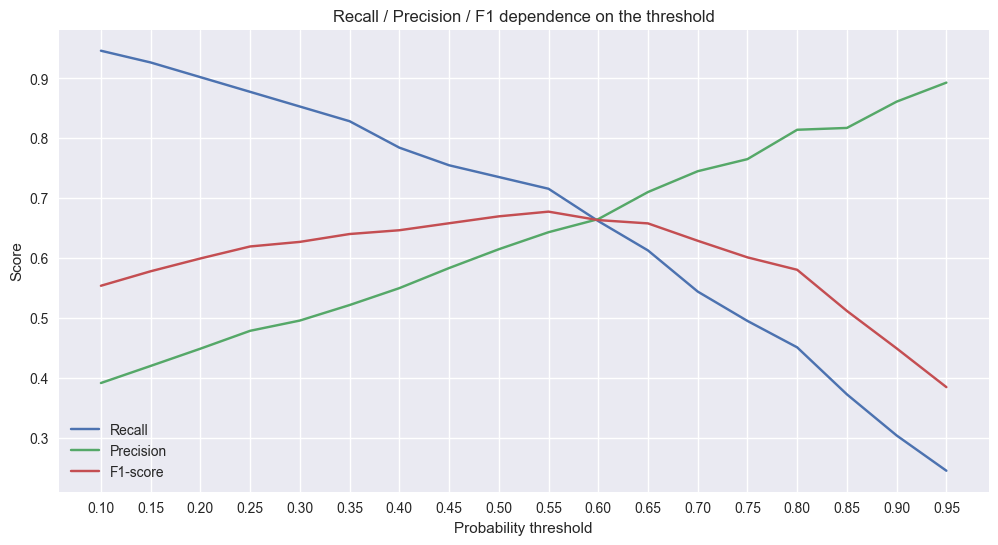

In [38]:
#make a probability prediction
y_test_proba_pred = log_reg_poly_feat.predict_proba(X_test_poly_feat_scaled)[:, 1]

#convert the matrix into a series
y_test_proba_pred = pd.Series(y_test_proba_pred)

#create lists to store metric values
recall_scores = []
precision_scores = []
f1_scores = []

#generate a set of threshold probabilities in the range from 0.1 to 1
thresholds = np.arange(0.1, 1, 0.05)

for threshold in thresholds:
    #assign Class 1 for probability of leaving > threshold, else Class 0
    y_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    
    #calculate the metrics and add it to the relevant list
    recall_scores.append(metrics.recall_score(y_test, y_pred))
    precision_scores.append(metrics.precision_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))

#visualize the metrics
fig, ax = plt.subplots(figsize=(12, 6))

#build a linear graph depending on the recall threshold
ax.plot(thresholds,
        recall_scores,
        label='Recall'
)

#build a linear graph depending on the precision threshold
ax.plot(thresholds,
        precision_scores,
        label='Precision'
)

#build a linear graph depending on the f1-score threshold
ax.plot(thresholds,
        f1_scores,
        label='F1-score'
)

#set the chart title and axis labels
ax.set(title='Recall / Precision / F1 dependence on the threshold',
       xlabel='Probability threshold',
       ylabel='Score'
)

#set the marks for x-axis
ax.set_xticks(thresholds) 

#set the legend
ax.legend();

In [39]:
#set the optimal probability threshold
threshold_opt = 0.57

#make a probability prediction
y_train_proba_pred = log_reg_poly_feat.predict_proba(X_train_poly_feat_scaled)[:, 1]

#convert the matrix into a series
y_train_proba_pred = pd.Series(y_train_proba_pred)

#assign Class 1 for probability of leaving > threshold, else Class 0
y_train_pred_pf = y_train_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
y_test_pred_pf = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

#display the classification metrics
print('Train Classification Metrics:')
print(f'Accuracy: {metrics.accuracy_score(y_train, y_train_pred_pf):.3f}')
print(f'Precision: {metrics.precision_score(y_train, y_train_pred_pf):.3f}')
print(f'Recall: {metrics.recall_score(y_train, y_train_pred_pf):.3f}')
print(f'F1-Score: {metrics.f1_score(y_train, y_train_pred_pf):.3f}')
print(metrics.classification_report(y_train, y_train_pred_pf))
print(sep='\n')

print('Test Classification Metrics:')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_test_pred_pf):.3f}')
print(f'Precision: {metrics.precision_score(y_test, y_test_pred_pf):.3f}')
print(f'Recall: {metrics.recall_score(y_test, y_test_pred_pf):.3f}')
print(f'F1-Score: {metrics.f1_score(y_test, y_test_pred_pf):.3f}')
print(metrics.classification_report(y_test, y_test_pred_pf))

Train Classification Metrics:
Accuracy: 0.845
Precision: 0.755
Recall: 0.774
F1-Score: 0.764
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1271
           1       0.76      0.77      0.76       610

    accuracy                           0.85      1881
   macro avg       0.82      0.83      0.82      1881
weighted avg       0.85      0.85      0.85      1881


Test Classification Metrics:
Accuracy: 0.785
Precision: 0.658
Recall: 0.706
F1-Score: 0.681
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       424
           1       0.66      0.71      0.68       204

    accuracy                           0.79       628
   macro avg       0.76      0.76      0.76       628
weighted avg       0.79      0.79      0.79       628



##### **Выводы:**

Линии метрик сходятся в точке 0.59, перебор значений threshold приводит к лучшим результам по четырем метрикам: accuracy, precision, recall, f1 score, когда threshold находится между значениями 0.56-0.57.

Лучшие результаты метрик для тренировочных и тестовых выборок:

1. threshold = 0.57 -> accuracy = 0.845 / 0.785
2. threshold = 0.57 -> precision = 0.755 / 0.658
3. threshold = 0.56 -> recall = 0.785 / 0.716
4. threshold = 0.56 -> f1-score = 0.765 / 0.684

## Практика: **Деревья Решений и Случайный Лес**

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [40]:
#use stratified samplifing to split the data evenly
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Импортируем необходимые для выполнения практики модули:

In [41]:
from sklearn import tree
from sklearn import ensemble

### **Задание 8.1**

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


In [42]:
#create the object class
decision_tree_f = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

#model learning by CART algorithm
decision_tree_f.fit(X_train, y_train)

#make class prediction 
y_train_pred_dt_f = decision_tree_f.predict(X_train)
y_test_pred_dt_f = decision_tree_f.predict(X_test)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1-Score: {metrics.f1_score(y_train, y_train_pred_dt_f):.3f}')
print(metrics.classification_report(y_train, y_train_pred_dt_f))
print(sep='\n')

print('Test Classification Metrics:')
print(f'F1-Score: {metrics.f1_score(y_test, y_test_pred_dt_f):.3f}')
print(metrics.classification_report(y_test, y_test_pred_dt_f))
print(sep='\n')

#find the depth level of the decision tree
print(f'find the depth level of the decision tree: {decision_tree_f.get_depth()}')

Train Classification Metrics:
F1-Score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881


Test Classification Metrics:
F1-Score: 0.569
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       424
           1       0.59      0.55      0.57       204

    accuracy                           0.73       628
   macro avg       0.69      0.68      0.69       628
weighted avg       0.72      0.73      0.73       628


find the depth level of the decision tree: 22


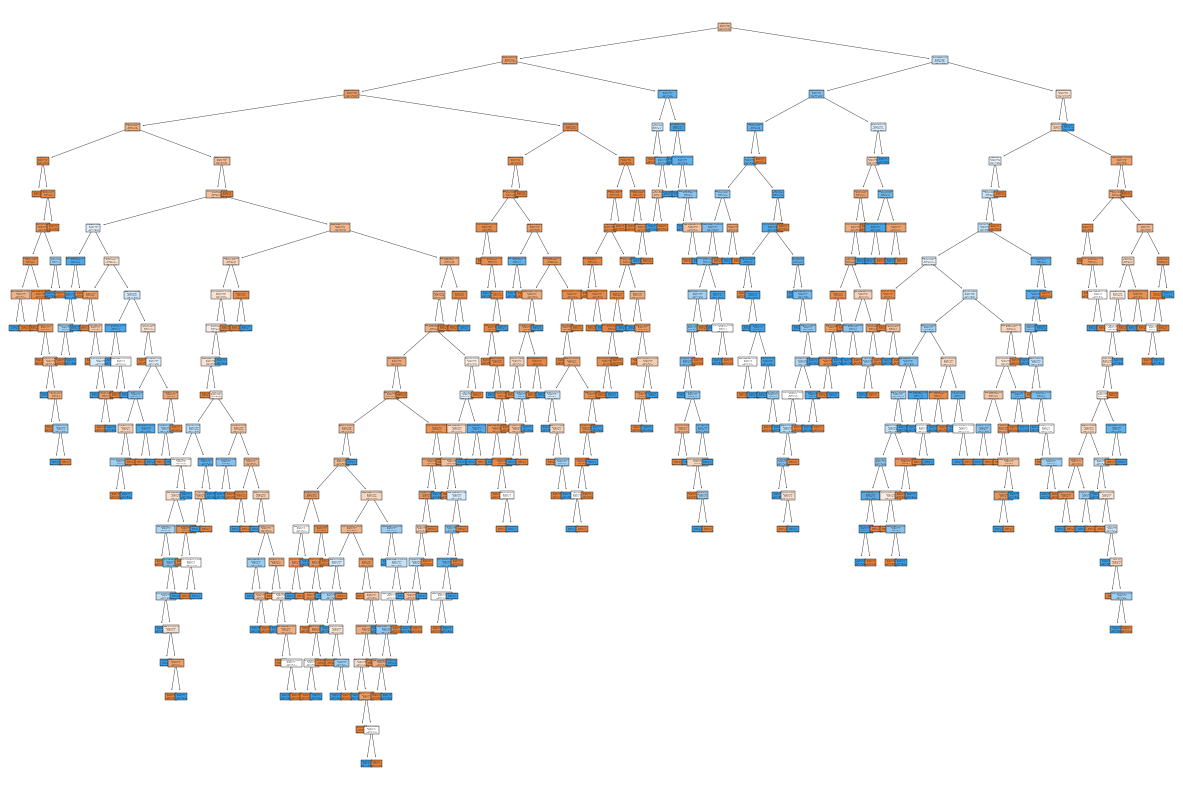

In [43]:
#set the canvas
fig = plt.figure(figsize=(15, 10))

#visualize the decision tree chart
tree_graph = tree.plot_tree(
    decision_tree_f, 
    feature_names=X.columns,
    class_names=['0 - Active', '1 - Exited'],
    filled=True,
);

##### **Выводы:**

Модель переобучена, так как метрики значительно отличаются на тренирочных и тестовых выборках: на тренировочных - уровень предсказания идеален (100%), на тестовых намного хуже < 60%. \
Глубина дерева решений слишком глубокая - 22, дерево задаёт огромное количество вопросов для того, чтобы правильно предсказать отток клиентов, и визуально представлена, как абсолютный хаос.

### **Задание 8.2**

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


In [44]:
#create the object class
decision_tree_e = tree.DecisionTreeClassifier(
    max_depth=8,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)

#model learning by CART algorithm
decision_tree_e.fit(X_train, y_train)

#make class prediction
y_train_pred_dt_e = decision_tree_e.predict(X_train)
y_test_pred_dt_e = decision_tree_e.predict(X_test)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1-Score: {metrics.f1_score(y_train, y_train_pred_dt_e):.3f}')
print(metrics.classification_report(y_train, y_train_pred_dt_e))
print(sep='\n')

print('Test Classification Metrics:')
print(f'F1-Score: {metrics.f1_score(y_test, y_test_pred_dt_e):.3f}')
print(metrics.classification_report(y_test, y_test_pred_dt_e))

Train Classification Metrics:
F1-Score: 0.717
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1271
           1       0.80      0.65      0.72       610

    accuracy                           0.83      1881
   macro avg       0.82      0.79      0.80      1881
weighted avg       0.83      0.83      0.83      1881


Test Classification Metrics:
F1-Score: 0.640
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       424
           1       0.71      0.58      0.64       204

    accuracy                           0.79       628
   macro avg       0.76      0.73      0.74       628
weighted avg       0.78      0.79      0.78       628



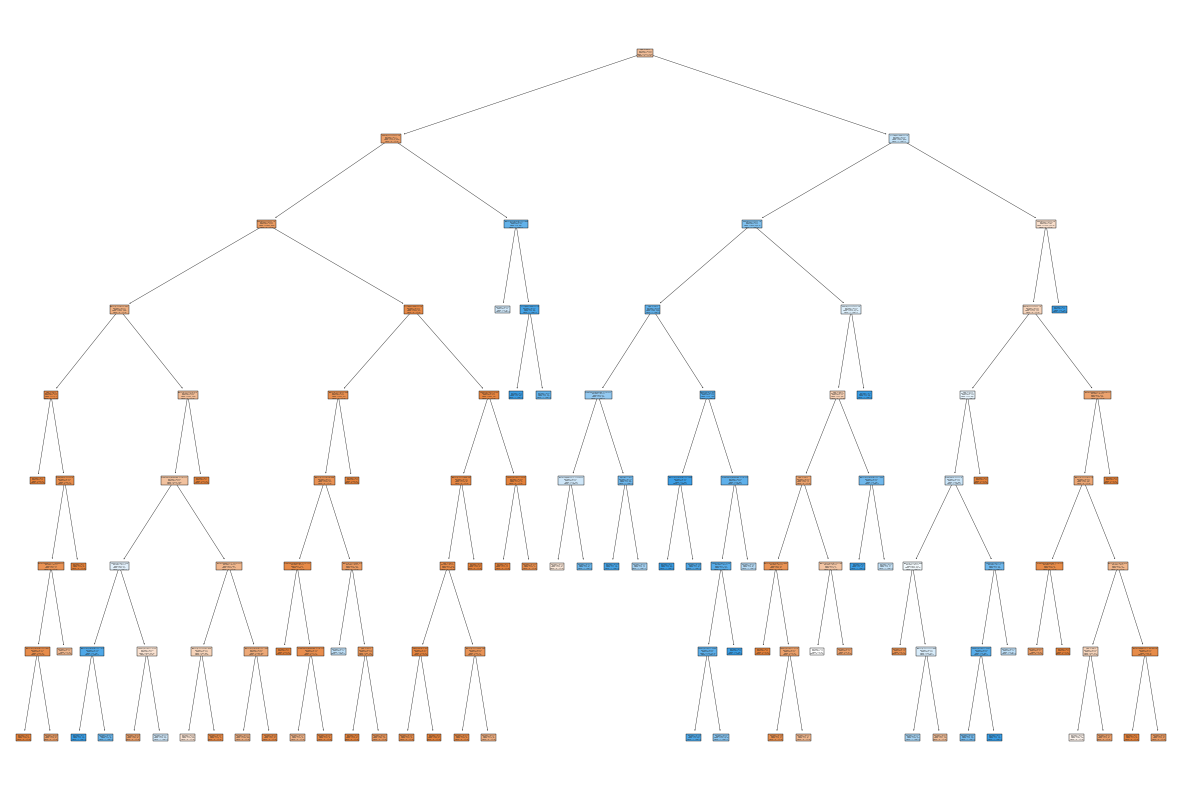

In [45]:
#set the canvas
fig = plt.figure(figsize=(15, 10))

#visualize the decision tree chart
tree_graph = tree.plot_tree(
    decision_tree_e, 
    feature_names=X.columns,
    class_names=['0 - Active', '1 - Exited'],
    filled=True,
);

##### **Выводы:**

Модель улучшена при применении ограничений по основным и целевой метрик. \
Переобучения не наблюдается, так как глубина дерева решений и количество листьев ограничена, модель может неплохо работать на реальных данных.

### **Задание 8.3**

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


In [46]:
#create the object class
random_forest_e = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)

#model learning
random_forest_e.fit(X_train, y_train)

#make class prediction
y_train_pred_rf_e = random_forest_e.predict(X_train)
y_test_pred_rf_e = random_forest_e.predict(X_test)

#display the classification metrics
print('Train Classification Metrics:')
print(f'F1-Score: {metrics.f1_score(y_train, y_train_pred_rf_e):.3f}')
print(metrics.classification_report(y_train, y_train_pred_rf_e))
print(sep='\n')

print('Test Classification Metrics:')
print(f'F1-Score: {metrics.f1_score(y_test, y_test_pred_rf_e):.3f}')
print(metrics.classification_report(y_test, y_test_pred_rf_e))

Train Classification Metrics:
F1-Score: 0.736
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1271
           1       0.86      0.64      0.74       610

    accuracy                           0.85      1881
   macro avg       0.85      0.80      0.82      1881
weighted avg       0.85      0.85      0.84      1881


Test Classification Metrics:
F1-Score: 0.659
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       424
           1       0.75      0.59      0.66       204

    accuracy                           0.80       628
   macro avg       0.79      0.75      0.76       628
weighted avg       0.80      0.80      0.80       628



##### **Выводы:**

Модель, построенная по методу случайный лес улучшает модель, построенную по методу деревья решений: 0.659 > 0.640.

### **Задание 8.4**

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



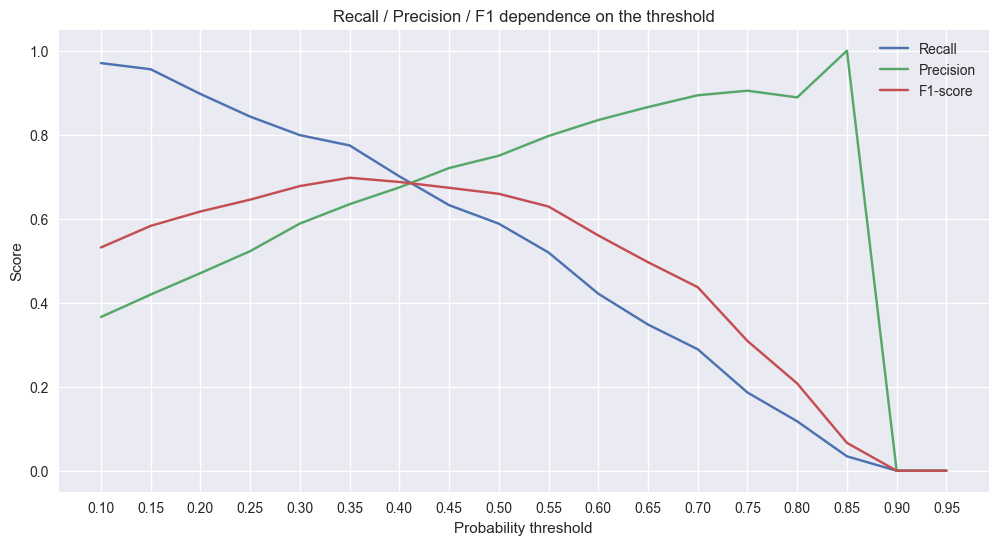

In [47]:
#make a probability prediction
y_test_proba_pred = random_forest_e.predict_proba(X_test)[:, 1]

#convert the matrix into a series
y_test_proba_pred = pd.Series(y_test_proba_pred)

#create lists to store metric values
recall_scores = []
precision_scores = []
f1_scores = []

#generate a set of threshold probabilities in the range from 0.1 to 1
thresholds = np.arange(0.1, 1, 0.05)

for threshold in thresholds:
    #assign Class 1 for probability of leaving > threshold, else Class 0
    y_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    
    #calculate the metrics and add it to the relevant list
    recall_scores.append(metrics.recall_score(y_test, y_pred))
    precision_scores.append(metrics.precision_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))

#visualize the metrics
fig, ax = plt.subplots(figsize=(12, 6))

#build a linear graph depending on the recall threshold
ax.plot(thresholds,
        recall_scores,
        label='Recall'
)

#build a linear graph depending on the precision threshold
ax.plot(thresholds,
        precision_scores,
        label='Precision'
)

#build a linear graph depending on the f1-score threshold
ax.plot(thresholds,
        f1_scores,
        label='F1-score'
)

#set the chart title and axis labels
ax.set(title='Recall / Precision / F1 dependence on the threshold',
       xlabel='Probability threshold',
       ylabel='Score'
)

#set the marks for x-axis
ax.set_xticks(thresholds) 

#set the legend
ax.legend();

In [48]:
#set the optimal probability threshold
threshold_opt = 0.35

#make a probability prediction
y_train_proba_pred = random_forest_e.predict_proba(X_train)[:, 1]

#convert the matrix into a series
y_train_proba_pred = pd.Series(y_train_proba_pred)

#assign Class 1 for probability of leaving > threshold, else Class 0
y_train_pred_rf = y_train_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
y_test_pred_rf = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

#display the classification metrics
print('Train Classification Metrics:')
print(f'Accuracy: {metrics.accuracy_score(y_train, y_train_pred_rf):.3f}')
print(f'Precision: {metrics.precision_score(y_train, y_train_pred_rf):.3f}')
print(f'Recall: {metrics.recall_score(y_train, y_train_pred_rf):.3f}')
print(f'F1-Score: {metrics.f1_score(y_train, y_train_pred_rf):.3f}')
print(metrics.classification_report(y_train, y_train_pred_rf))
print(sep='\n')

print('Test Classification Metrics:')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_test_pred_rf):.3f}')
print(f'Precision: {metrics.precision_score(y_test, y_test_pred_rf):.3f}')
print(f'Recall: {metrics.recall_score(y_test, y_test_pred_rf):.3f}')
print(f'F1-Score: {metrics.f1_score(y_test, y_test_pred_rf):.3f}')
print(metrics.classification_report(y_test, y_test_pred_rf))

Train Classification Metrics:
Accuracy: 0.841
Precision: 0.729
Recall: 0.808
F1-Score: 0.767
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1271
           1       0.73      0.81      0.77       610

    accuracy                           0.84      1881
   macro avg       0.82      0.83      0.82      1881
weighted avg       0.85      0.84      0.84      1881


Test Classification Metrics:
Accuracy: 0.782
Precision: 0.635
Recall: 0.775
F1-Score: 0.698
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       424
           1       0.63      0.77      0.70       204

    accuracy                           0.78       628
   macro avg       0.76      0.78      0.76       628
weighted avg       0.80      0.78      0.79       628



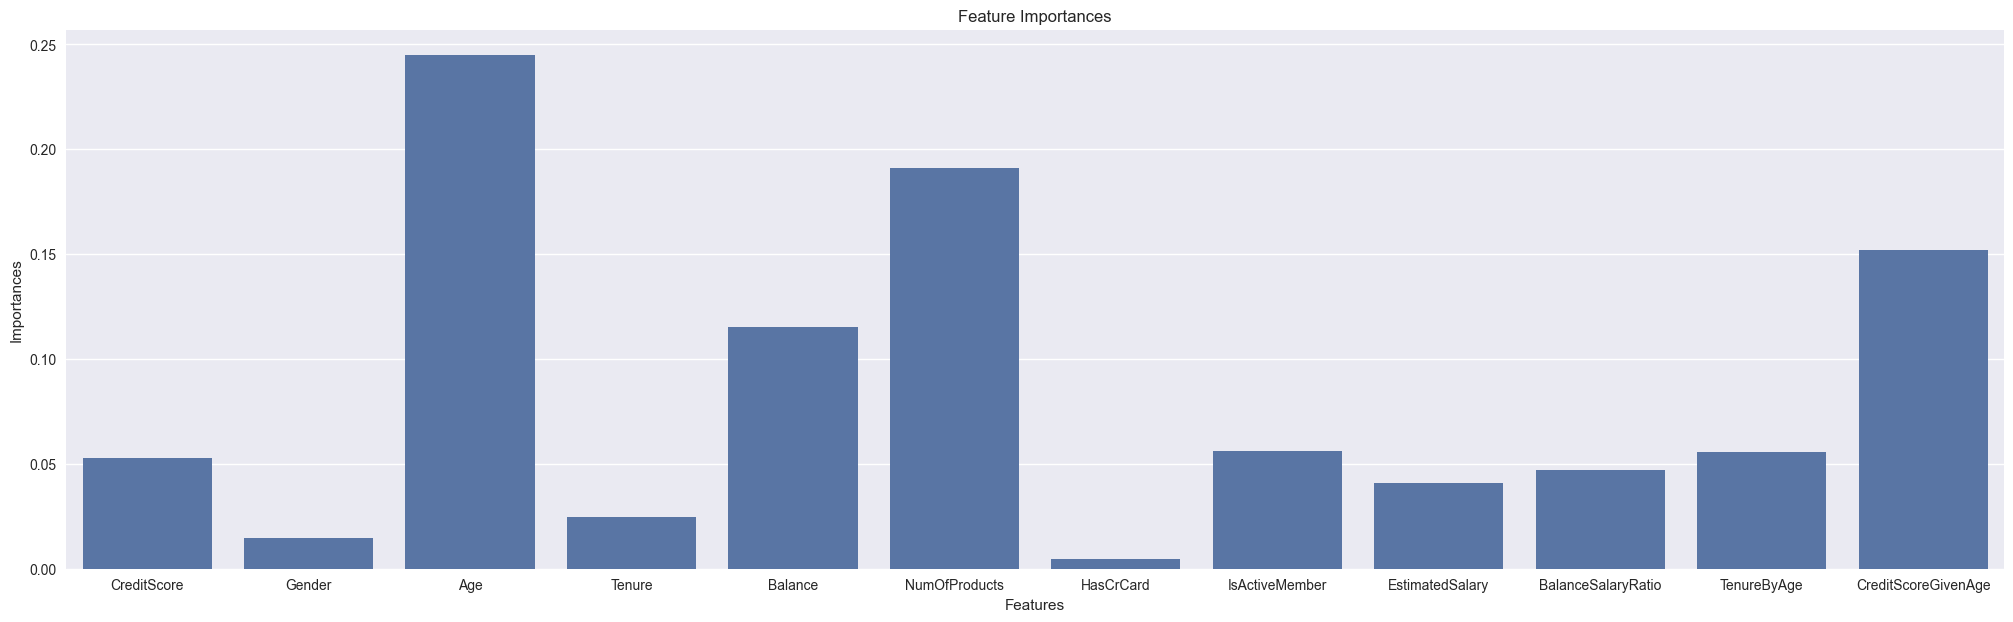

In [49]:
#set the canvas
fig, ax = plt.subplots(figsize=(25, 7))

#separate the features
feature = X.columns

#rank the features by importance
feature_importances = random_forest_e.feature_importances_

#build the bar chart
sns.barplot(x=feature,
            y=feature_importances,
            ax=ax
)

#set the chart title and labels
ax.set_title('Feature Importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

##### **Выводы:**

Линии метрик сходятся в точке 0.42, перебор значений threshold приводит к лучшим результам по четырем метрикам: accuracy, precision, recall, f1 score, когда threshold находится между значениями 0.34-0.37.

Лучшие результаты метрик для тренировочных и тестовых выборок находится в точке 0.35.

### **Задание 8.5**

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

In [50]:
#create a new dataframe with one record
new_record = {
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}

new_record = pd.DataFrame(new_record)

In [51]:
#encode the feature numerically
new_record['Gender'] = new_record['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [52]:
#convert the data types to match the original data set
new_record['CreditScore'] = new_record['CreditScore'].to_numpy('int64')
new_record['Age'] = new_record['Age'].to_numpy('int64')
new_record['Tenure'] = new_record['Tenure'].to_numpy('int64')
new_record['NumOfProducts'] = new_record['NumOfProducts'].to_numpy('int64')
new_record['HasCrCard'] = new_record['HasCrCard'].to_numpy('int64')
new_record['IsActiveMember'] = new_record['IsActiveMember'].to_numpy('int64')

In [53]:
#create new features
new_record['BalanceSalaryRatio'] = new_record['Balance'] / new_record['EstimatedSalary']
new_record['TenureByAge'] = new_record['Tenure'] / (new_record['Age'])
new_record['CreditScoreGivenAge'] = new_record['CreditScore'] / (new_record['Age'])

##### Logistic Regression with Polynomial Features

In [54]:
#normalize the sample
new_record_r_scaled = r_scaler.transform(new_record)

#generate the polynomial features
new_record_pf = poly_feat_scaler.transform(new_record_r_scaled)

#make the probability prediction
y_new_record_pred_pp = log_reg_poly_feat.predict_proba(new_record_pf)

#make the class prediction
y_new_record_pred_cp = log_reg_poly_feat.predict(new_record_pf)

#display the results
print(f'Probability Prediction: {y_new_record_pred_pp.round(3)}')
print(f'Predicted Class: {y_new_record_pred_cp}')

Probability Prediction: [[0.262 0.738]]
Predicted Class: [1]


##### Random Forest Model

In [55]:
#make the probability prediction
y_new_record_pred_pp = random_forest_e.predict_proba(new_record)

#make the class prediction
y_new_record_pred_cp = random_forest_e.predict(new_record)

#display the results
print(f'Probability Prediction: {y_new_record_pred_pp.round(3)}')
print(f'Predicted Class: {y_new_record_pred_cp}')

Probability Prediction: [[0.386 0.614]]
Predicted Class: [1]


##### **Выводы:**

Модель логистической регрессии со стохастическим градиентным спуском предсказывает вероятность ухода клиента в 73.8%, модель случайного леса - в 61.4%. По метрикам модель логистической регрессии лидирует, однако метод обучения имеет склонность к большому смещению и низкую дисперсию, и хорошо работает только с линейными данными, и имеет склонность к переобучению.

Модель случайного леса выигрывает по нескольким факторам:
- может обрабатывать пропуски, выбросы и нелинейные связи;
- не требует масштабирования данных;
- может моделировать сложные отношения между признаками;
- может эффективно обрабатывать большие объемы данных;
- может лучше обрабатывать несбалансированные наборы данных, поэтому не требует стратифицированной выборки;
- может использоваться для анализа важности признаков.